In [1]:
import numpy as np 
import yaml
import os 
import matplotlib.pyplot as plt

def csvread(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_rmsd = {}
    counter = 0
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary
            if counter == 0:
                data_rmsd['frame'] = []
                counter += 1
                for j in np.arange(len(line)):
                    data_rmsd[str(j)] = []
            for i in np.arange(len(line)):
                element = line[i]
                if i == 0:
                    data_rmsd['frame'].append(int(element))
                else:
                    data_rmsd[str(i)].append(float(element))

    return data_rmsd


def refined_rmsd_resting(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 500:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

def refined_rmsd_activated(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 100:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg

In [2]:
def plotter(name1,name2):
    os.chdir('../'+name1)
    avg1, msd1, time1 = refined_rmsd_resting('rmsdresting1')
    avg2, msd2, time2 = refined_rmsd_resting('rmsdresting2')
    avg3, msd3, time3 = refined_rmsd_resting('rmsdresting3')
    avg4, msd4, time4 = refined_rmsd_resting('rmsdresting4')

    os.chdir('../'+name2)
    avg5, msd5, time5 = refined_rmsd_resting('rmsdresting1')
    avg6, msd6, time6 = refined_rmsd_resting('rmsdresting2')
    avg7, msd7, time7 = refined_rmsd_resting('rmsdresting3')
    avg8, msd8, time8 = refined_rmsd_resting('rmsdresting4')
    
    plt.figure(figsize=(12,4),dpi=150)
    plt.subplot(1,2,1)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('RMSD')
    plt.plot(time1,avg1,'k',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: OFF')
    plt.plot(time2,avg2,'k',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: OFF')
    plt.plot(time3,avg3,'k',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.016: OFF')
    plt.plot(time4,avg4,'k',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: OFF')

    plt.plot(time5,avg5,'b',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: ON')
    plt.plot(time6,avg6,'b',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: ON')
    plt.plot(time7,avg7,'b',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.0016: ON')
    plt.plot(time8,avg8,'b',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: ON')

    plt.xlabel('steps (x1000)')
    plt.ylabel('distance (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('MSD')
    plt.plot(time1,msd1,'k',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: OFF')
    plt.plot(time2,msd2,'k',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: OFF')
    plt.plot(time3,msd3,'k',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.016: OFF')
    plt.plot(time4,msd4,'k',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: OFF')

    plt.plot(time5,msd5,'b',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: ON')
    plt.plot(time6,msd6,'b',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: ON')
    plt.plot(time7,msd7,'b',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.0016: ON')
    plt.plot(time8,msd8,'b',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: ON')

    plt.xlabel('steps (x1000)')
    plt.ylabel('distance (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()
    
    return

# Resting Only

## State Variable Comparison 

1. No Tumor Cluster 
2. No Autocrine
3. Linear Diffusion

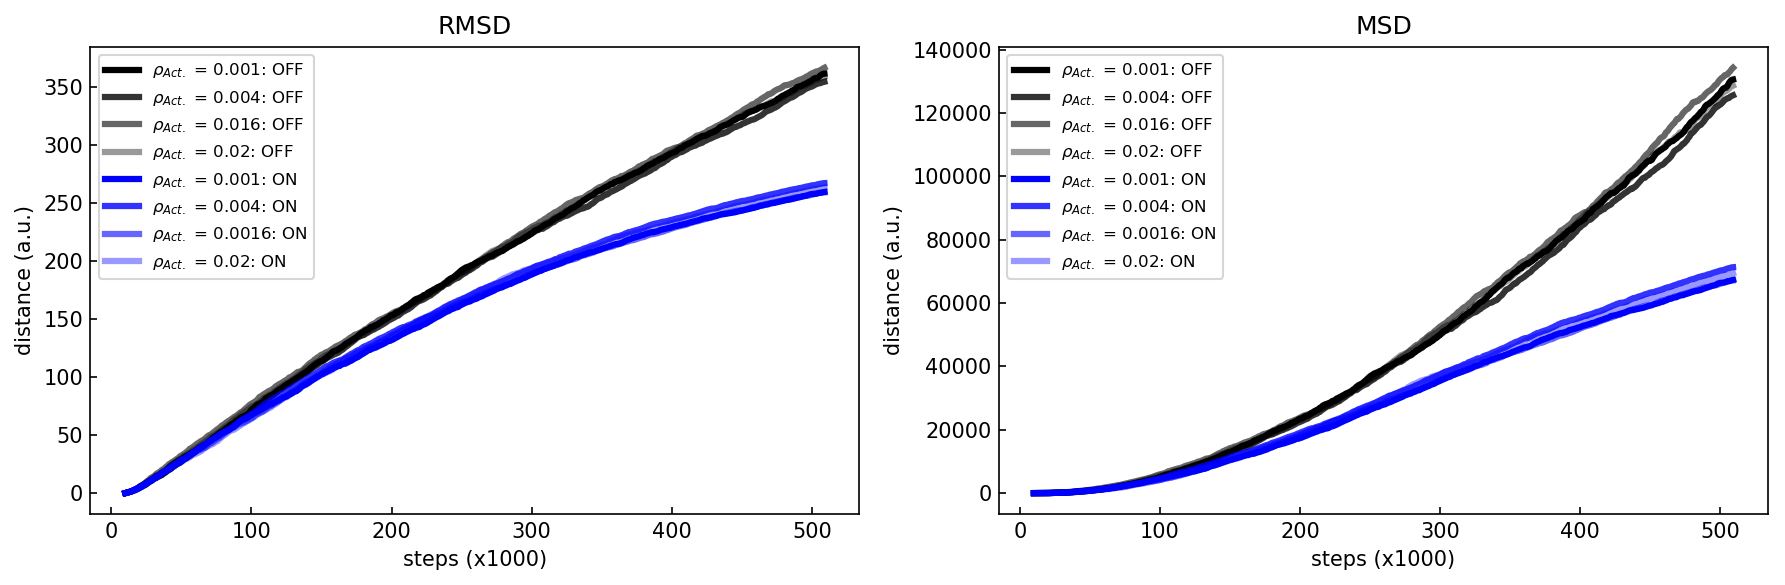

In [3]:
plotter('ver14','ver16')

# Resting Only

## State Variable Comparison 
1. With Tumor Cluster
2. No Autocine
3. Linear Diffusion 

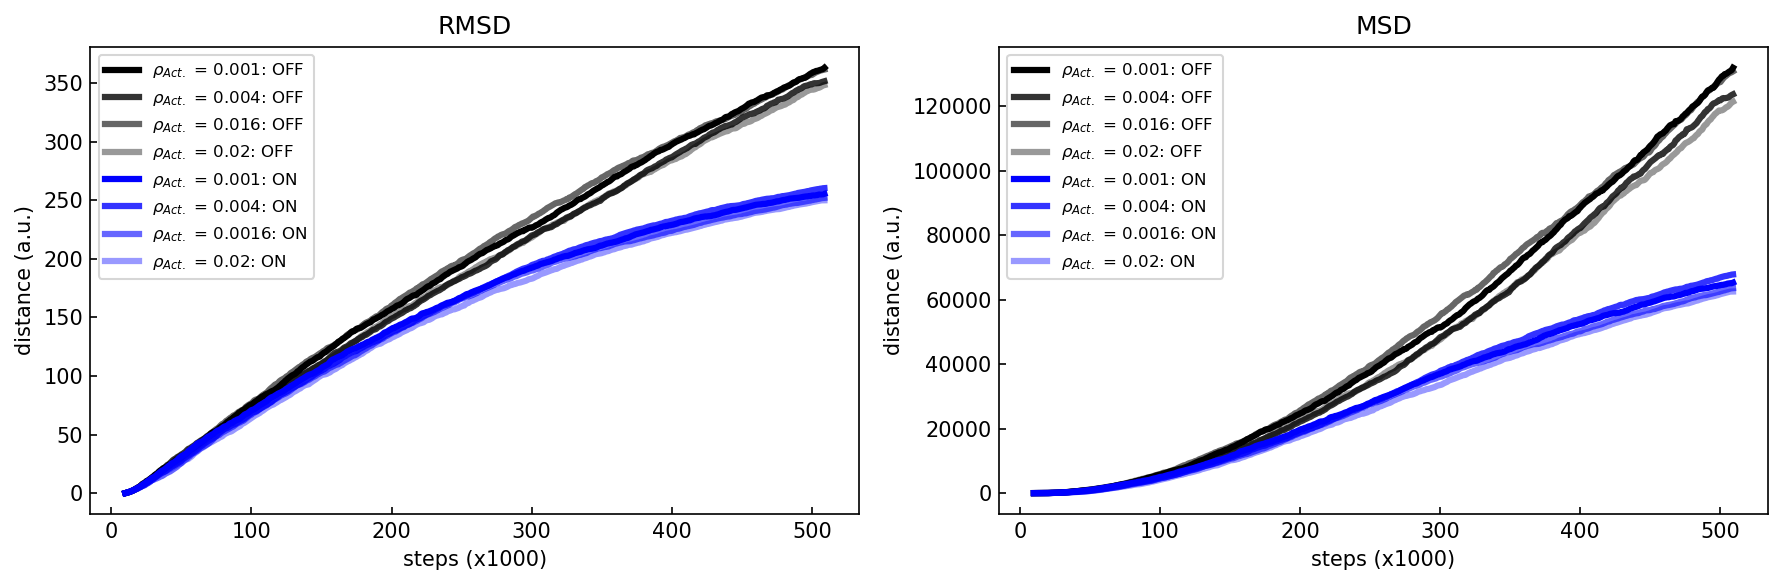

In [4]:
plotter('ver15','ver17')

# Resting Only

## State Variable Comparison 
1. No Tumor cluster
2. Autocine
3. Linear Diffusion 

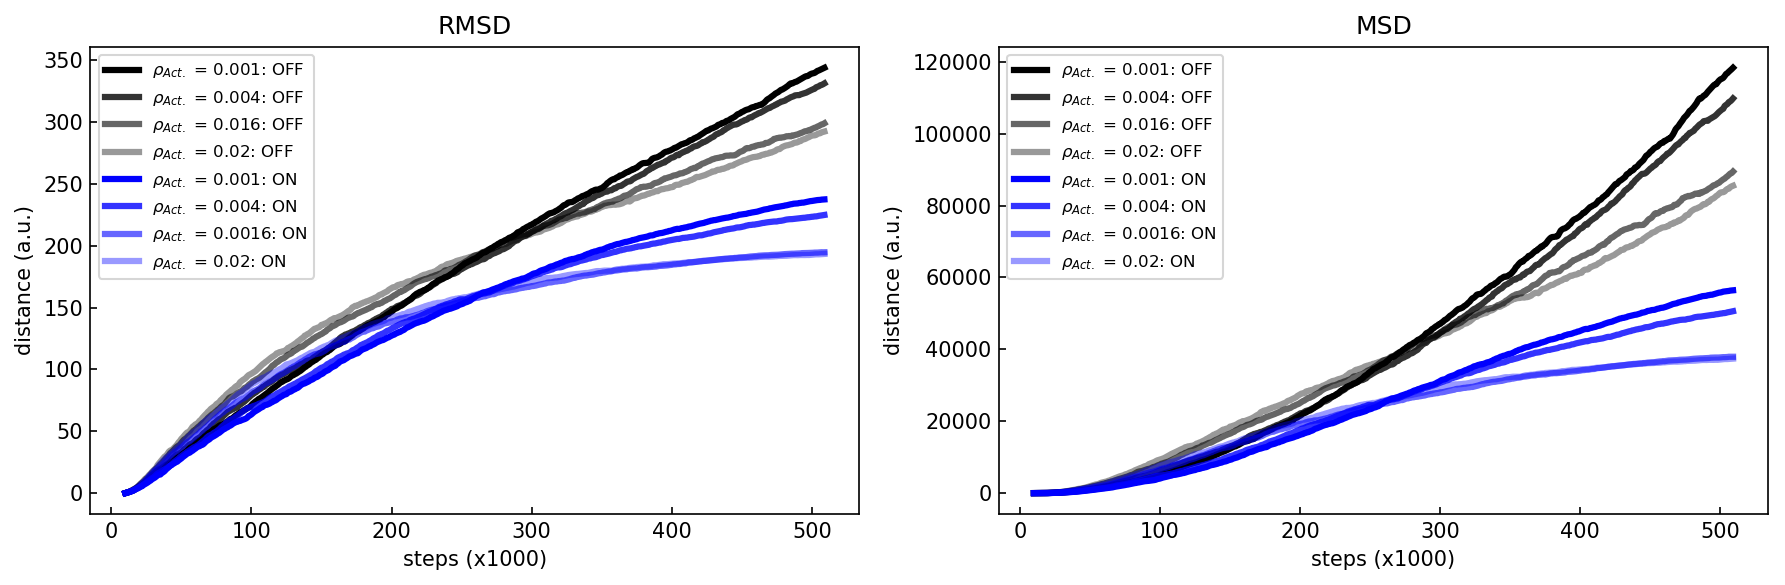

In [5]:
plotter('ver10','ver11')

# Resting Only

## State Variable Comparison 
1. With Tumor Cluster
2. Autocine
3. Linear Diffusion

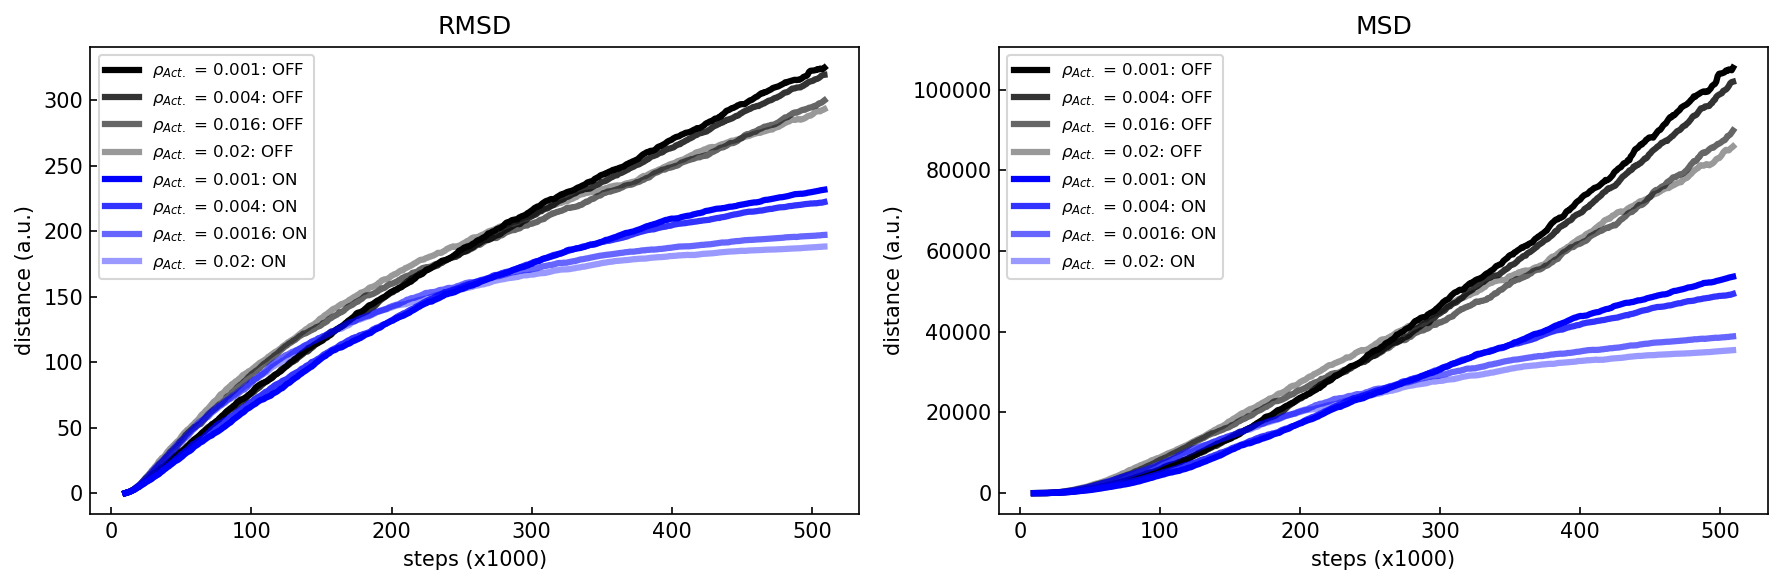

In [6]:
plotter('ver12','ver13')

# Resting Only

## State Variable Comparison 
1. No Tumor Cluster
2. No Autocine
3. Error Function

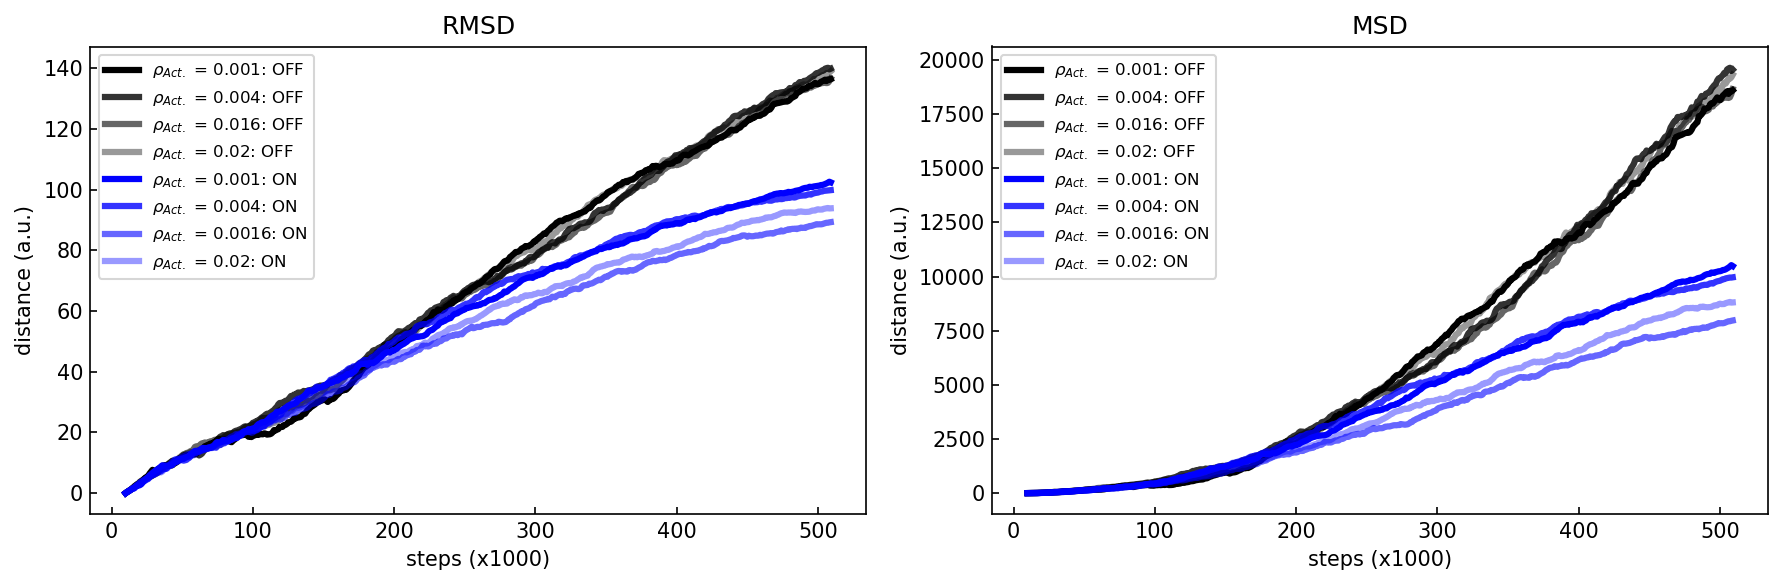

In [3]:
plotter('ver19','ver21')

# Resting Only

## State Variable Comparison 
1. No Tumor Cluster
2. Autocine
3. Error Function

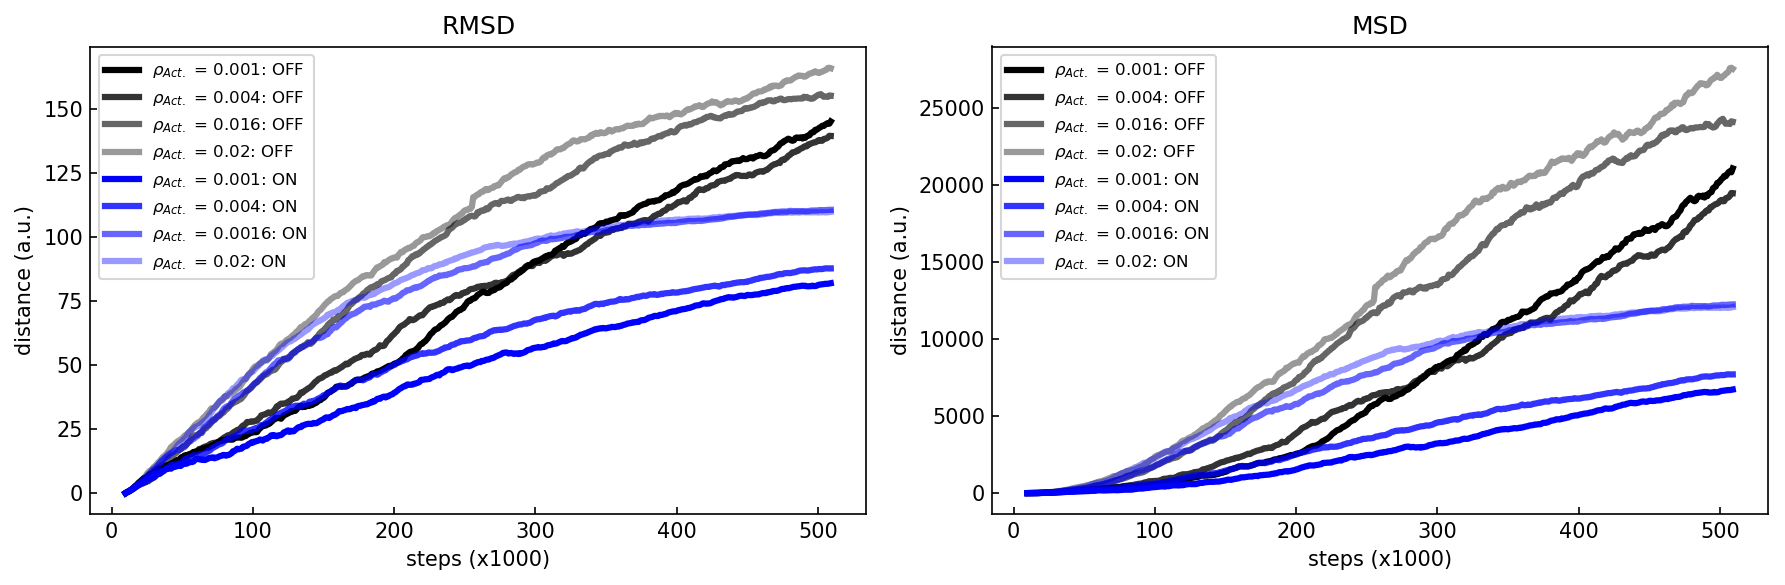

In [8]:
plotter('ver18','ver20')

# Resting Only

## Autocrine Comparison 
1. No Tumor Cluster
2. No State
3. Linear Diffusion

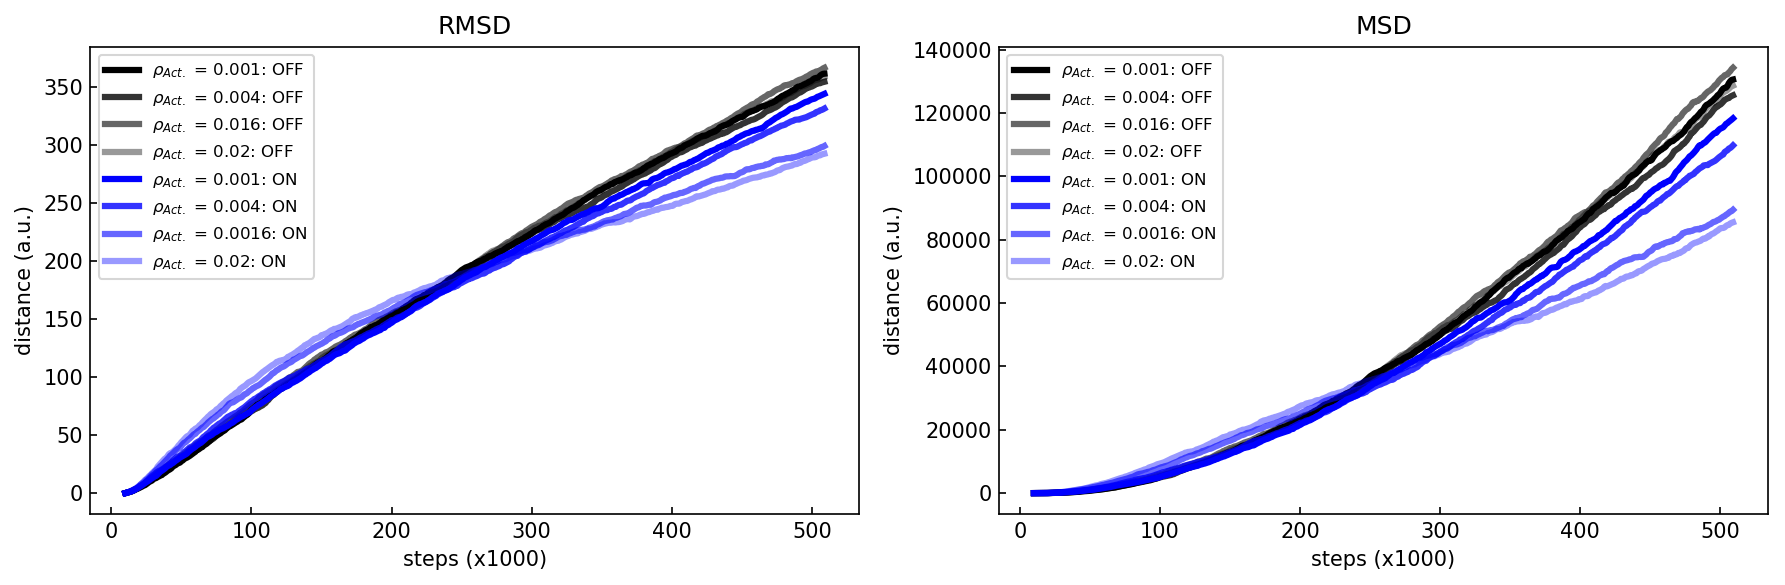

In [9]:
plotter('ver14','ver10')

# Resting Only

## Autocrine Comparison 
1. No Tumor Cluster
2. With State
3. Linear Diffusion

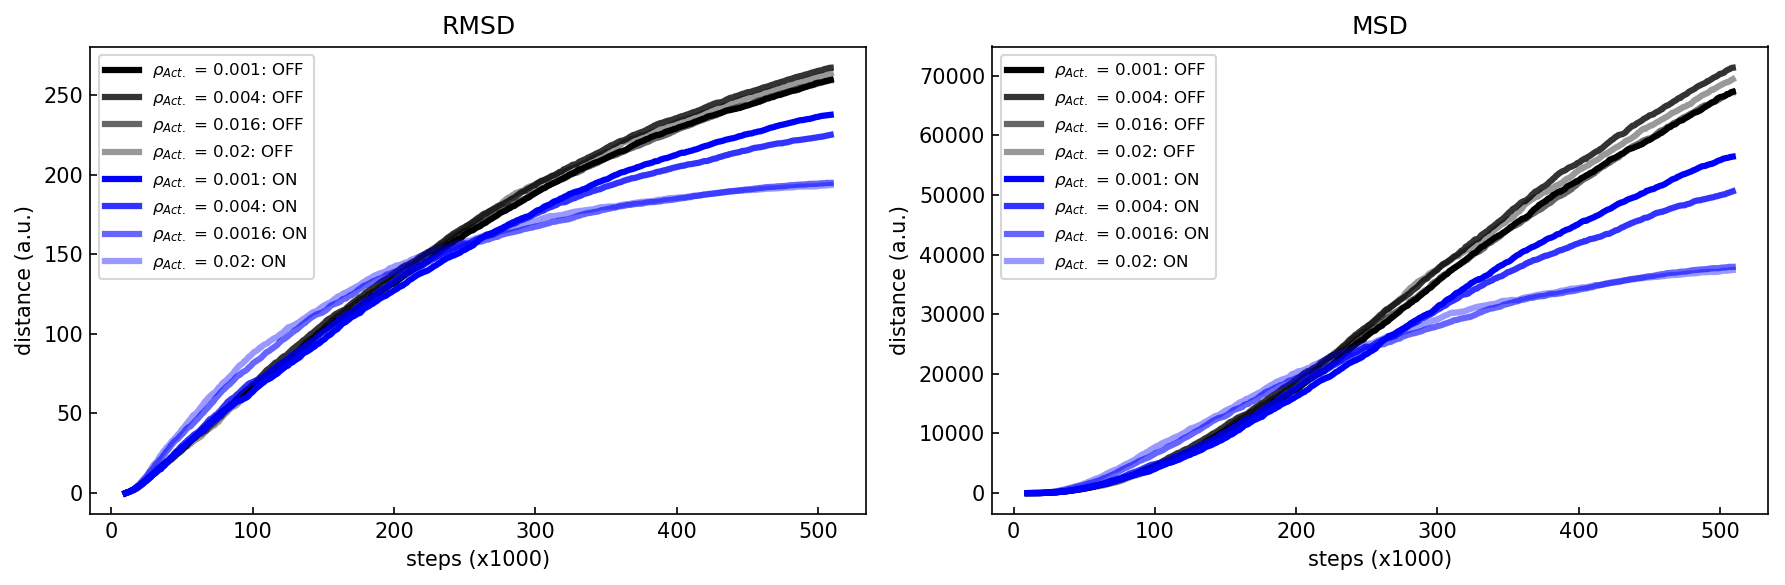

In [10]:
plotter('ver16','ver11')

# Resting Only

## Autocrine Comparison 
1. With Tumor Cluster
2. No State
3. Linear Diffusion

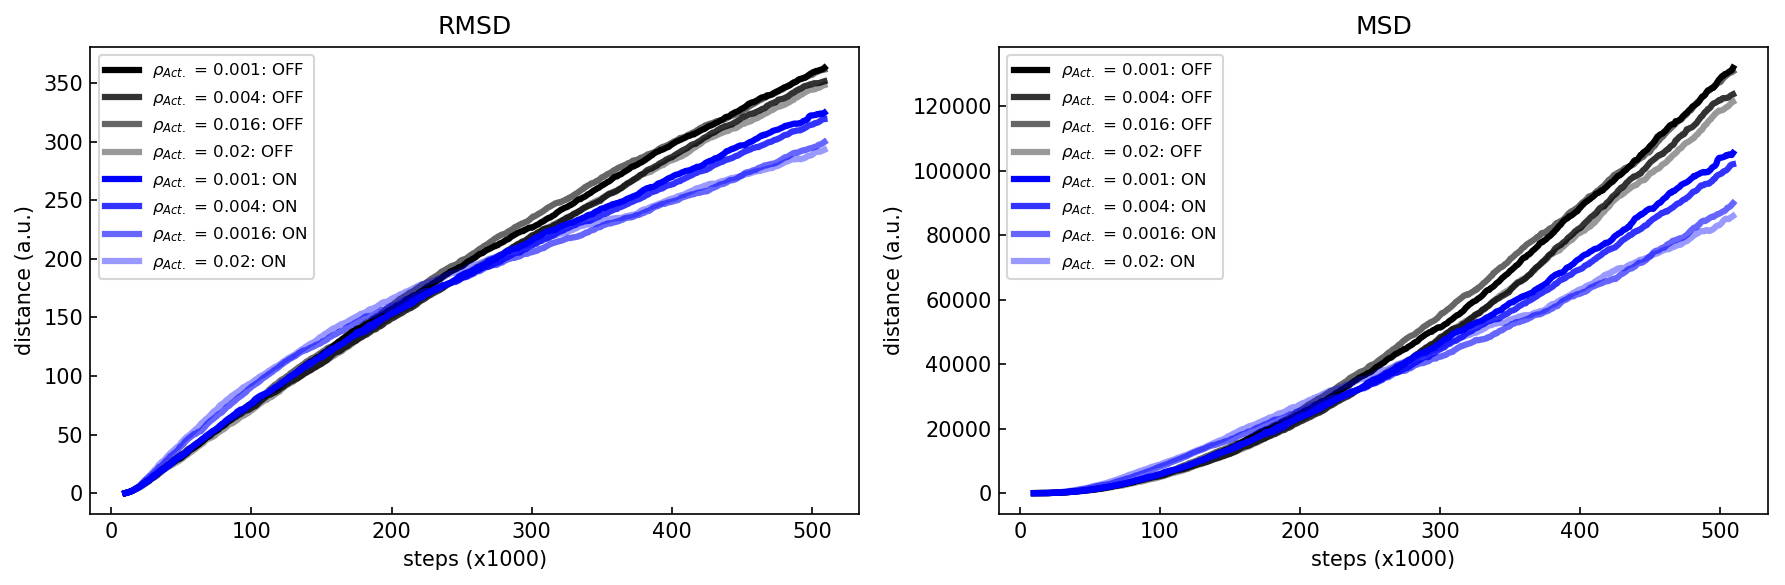

In [11]:
plotter('ver15','ver12')

# Resting Only

## Autocrine Comparison 
1. With Tumor Cluster
2. With State
3. Linear Diffusion

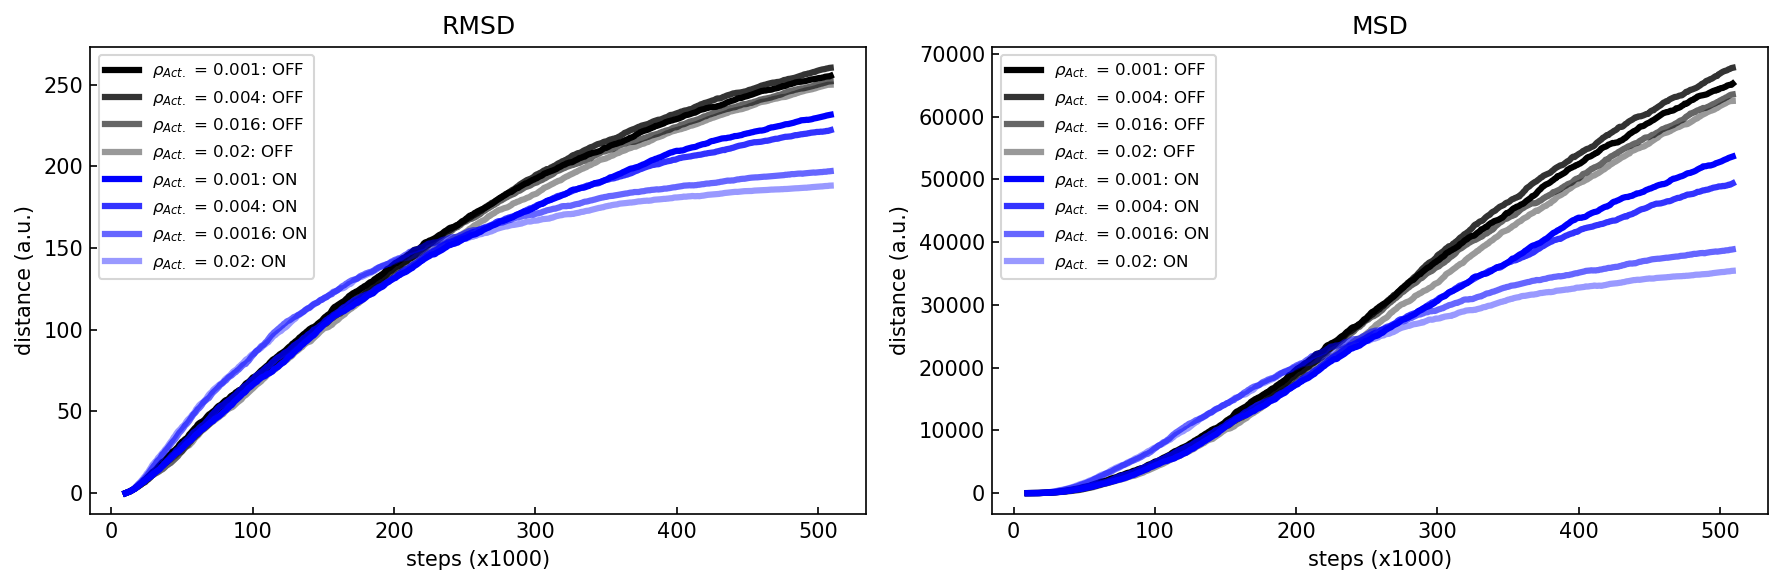

In [12]:
plotter('ver17','ver13')

# Resting Only

## Autocrine Comparison 
1. No Tumor Cluster
2. No State
3. Error Function

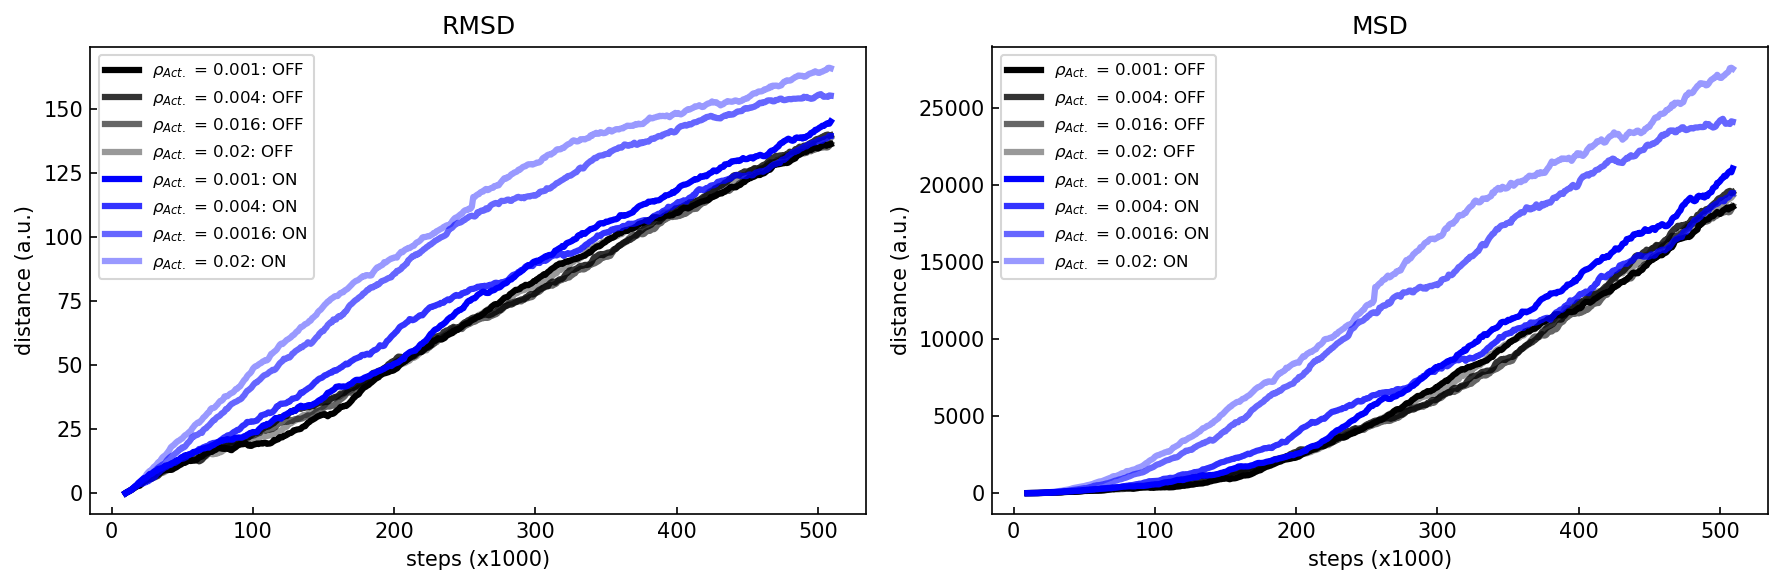

In [13]:
plotter('ver19','ver18')

# Resting Only

## Autocrine Comparison 
1. No Tumor Cluster
2. With State
3. Error Function

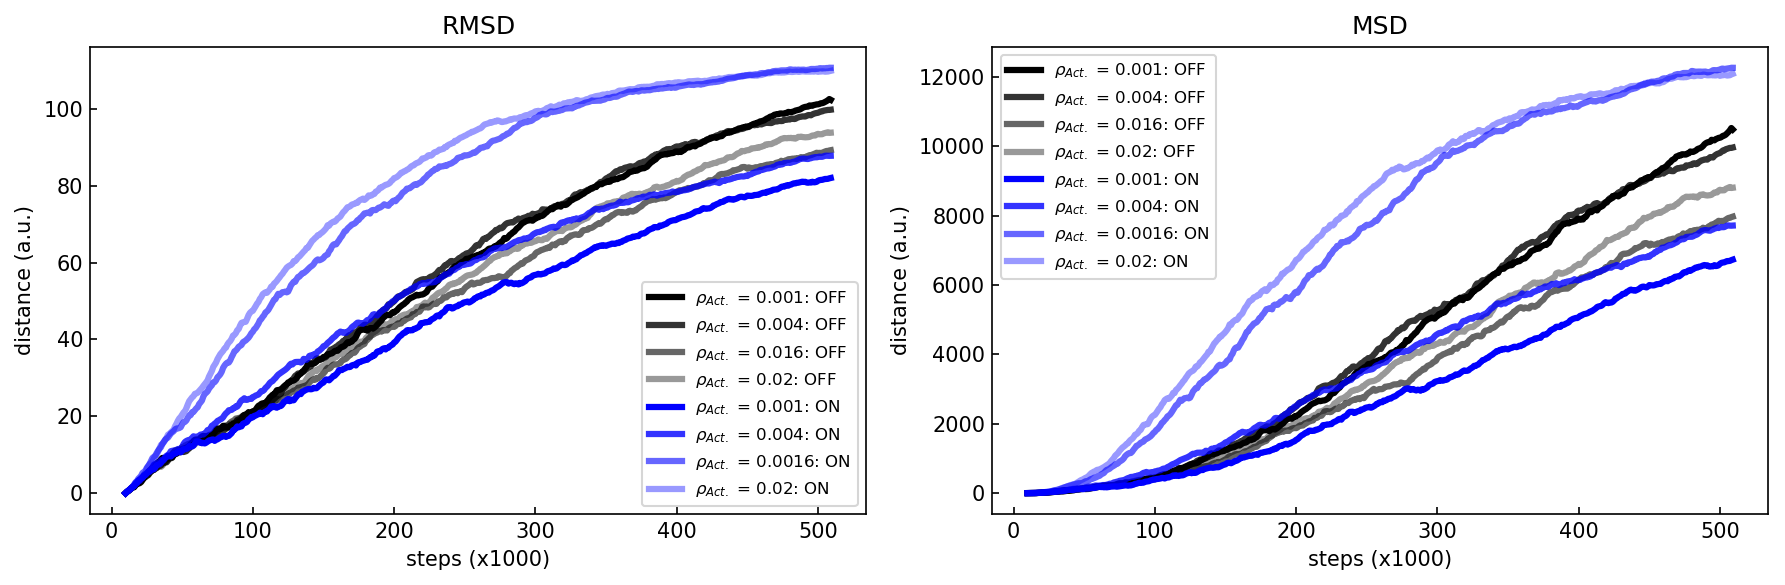

In [4]:
plotter('ver21','ver20')

# Resting Only

## Tumor Cluster Comparison 
1. No Autocrine
2. No State Variable
3. Linear

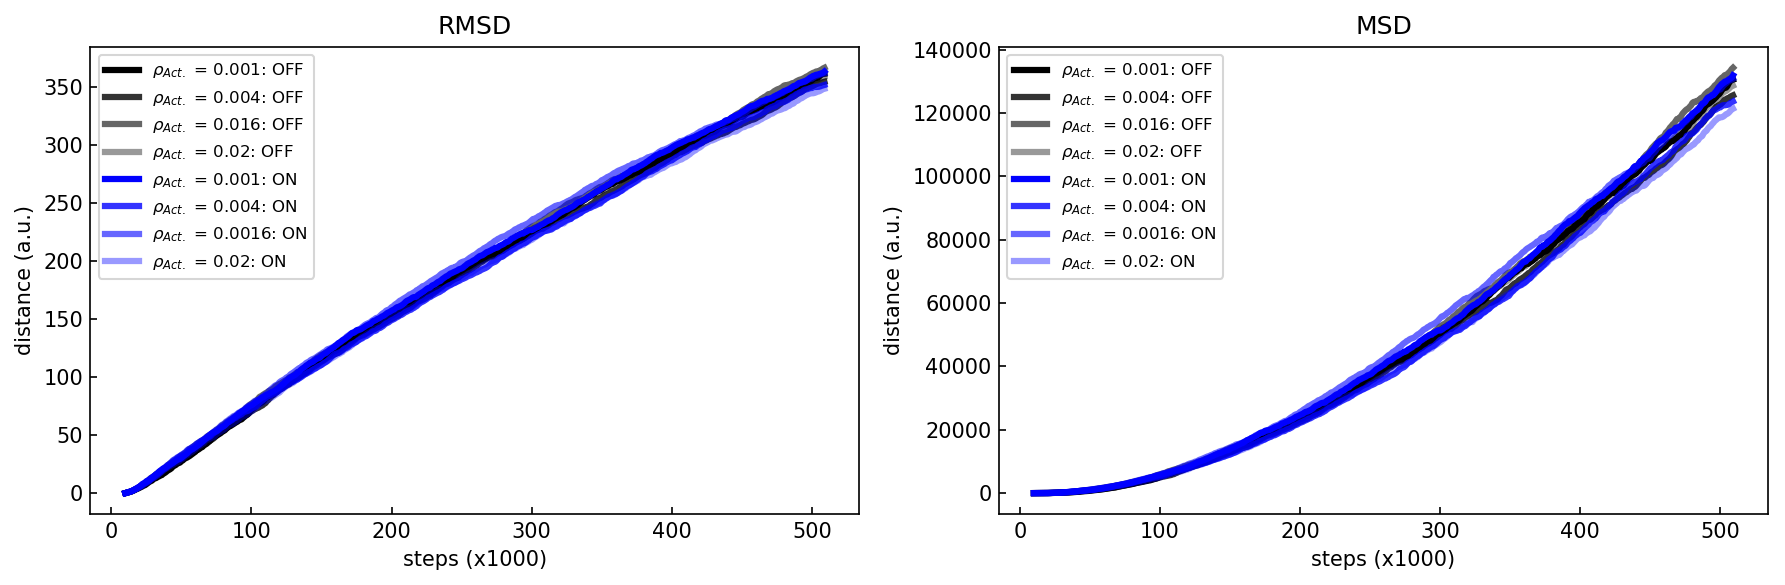

In [15]:
plotter('ver14','ver15')

# Resting Only

## Tumor Cluster Comparison 
1. With Autocrine
2. No State Variable
3. Linear

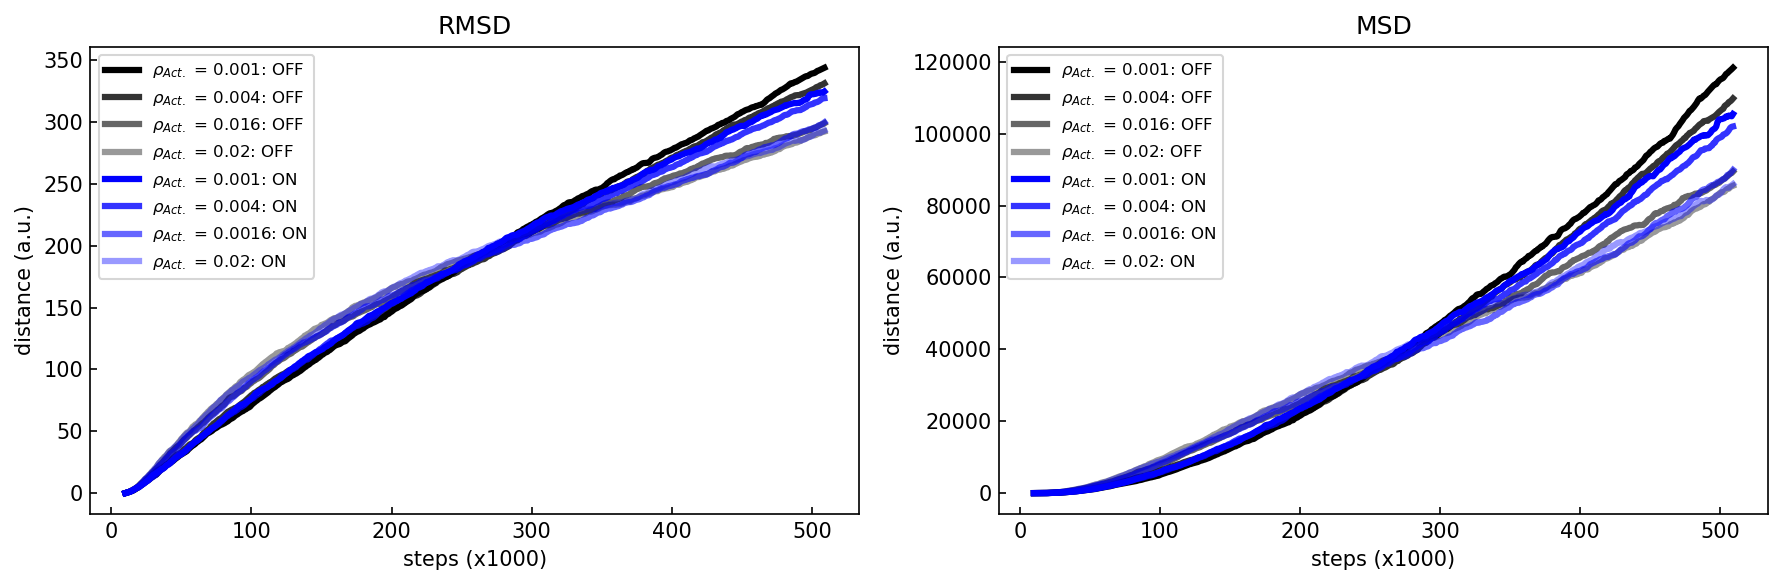

In [16]:
plotter('ver10','ver12')

# Resting Only

## Tumor Cluster Comparison 
1. No Autocrine
2. With State Variable
3. Linear

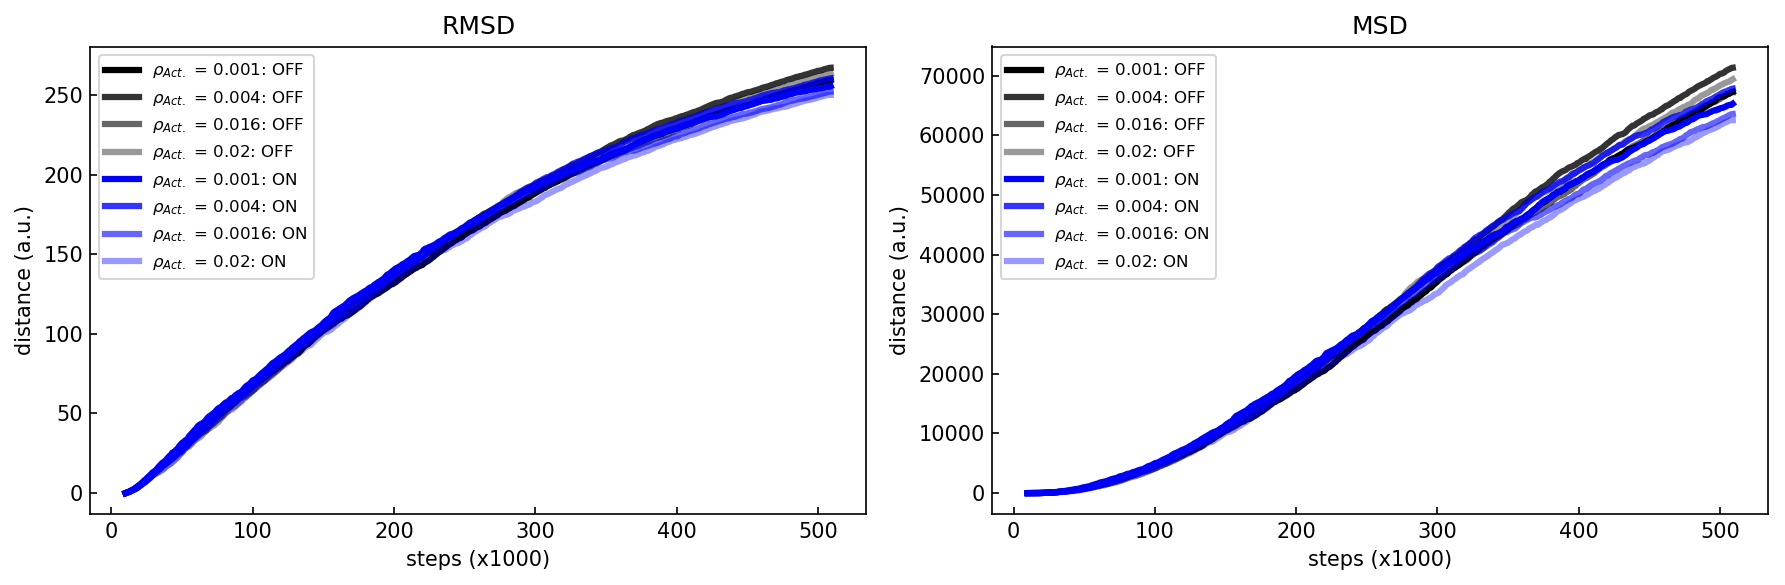

In [17]:
plotter('ver16','ver17')

# Resting Only

## Tumor Cluster Comparison 
1. With Autocrine
2. With State Variable
3. Linear

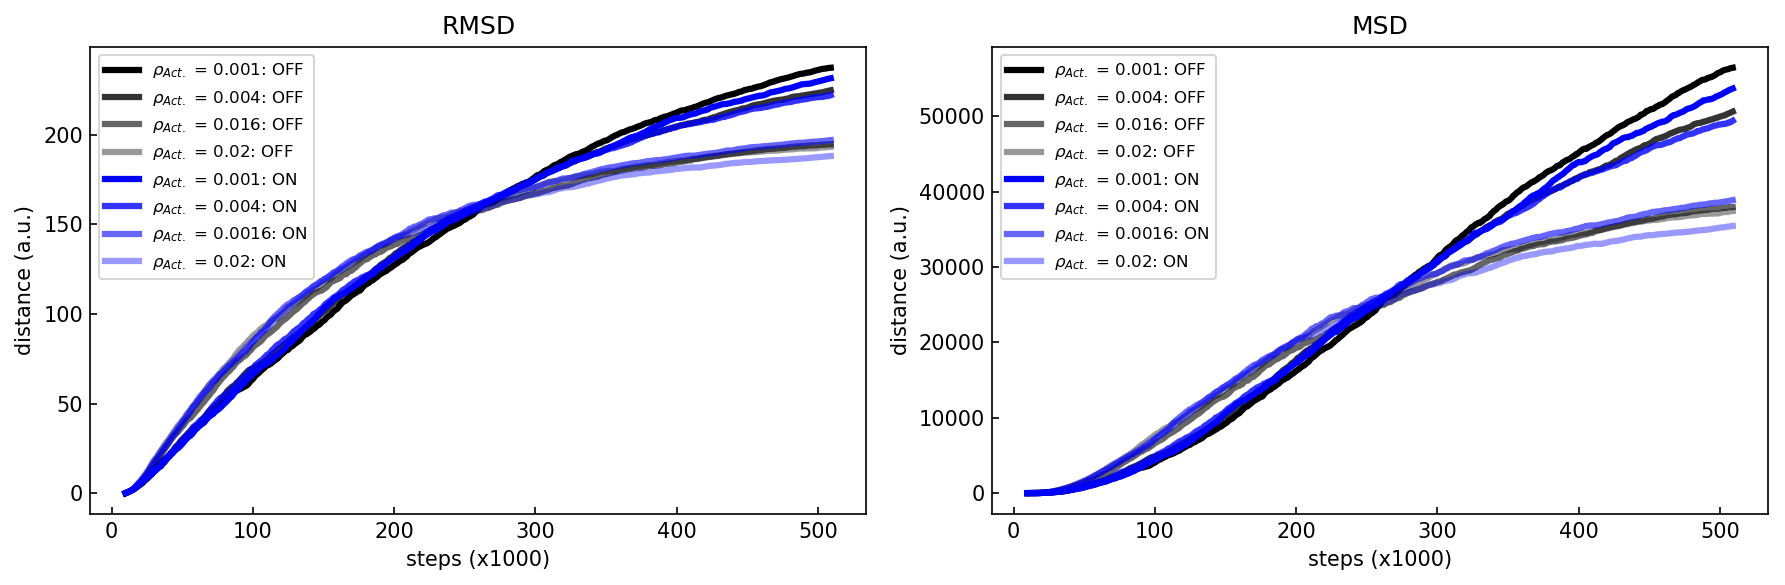

In [18]:
plotter('ver11','ver13')

# Resting Only

## Diffusion Model 
1. With Autocrine
2. With State Variable
3. No Cluster

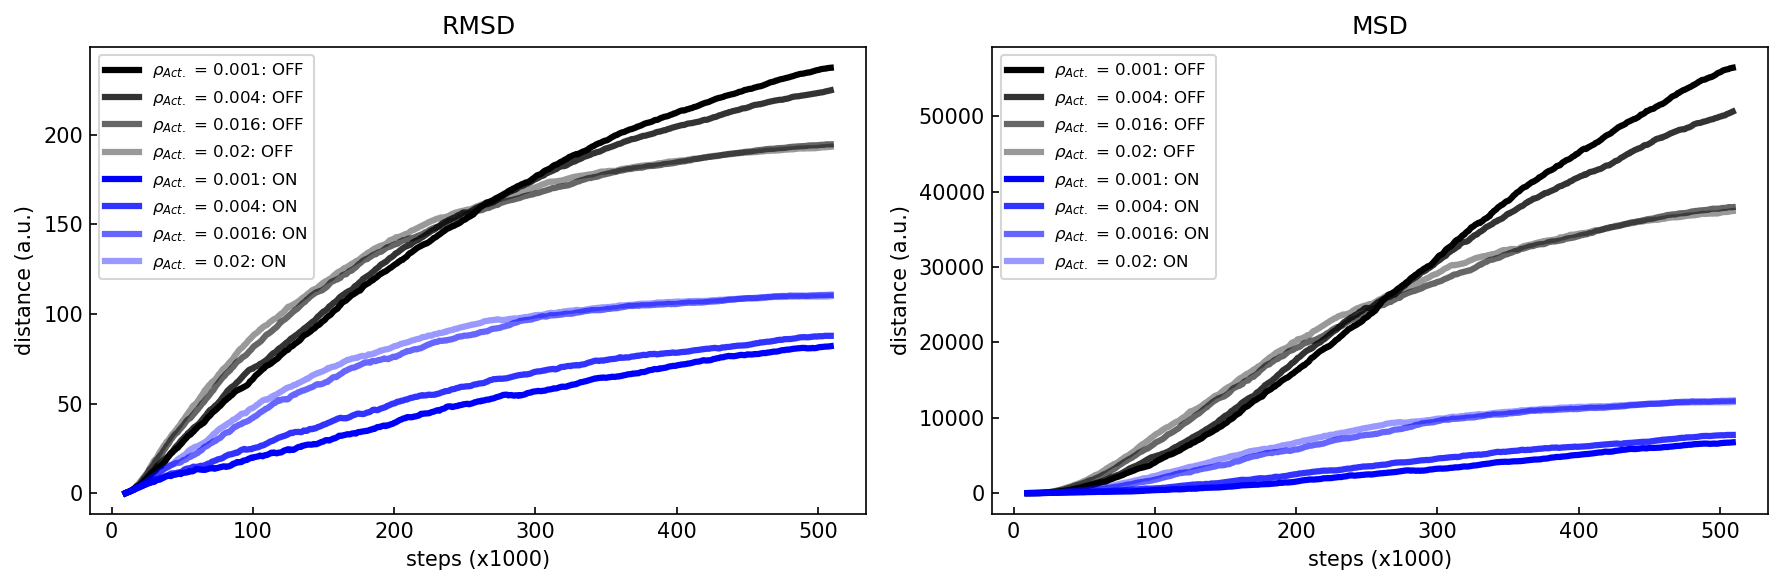

In [5]:
plotter('ver11','ver20')

# Resting Only

## Diffusion Model 
1. No Autocrine
2. With State Variable
3. No Cluster

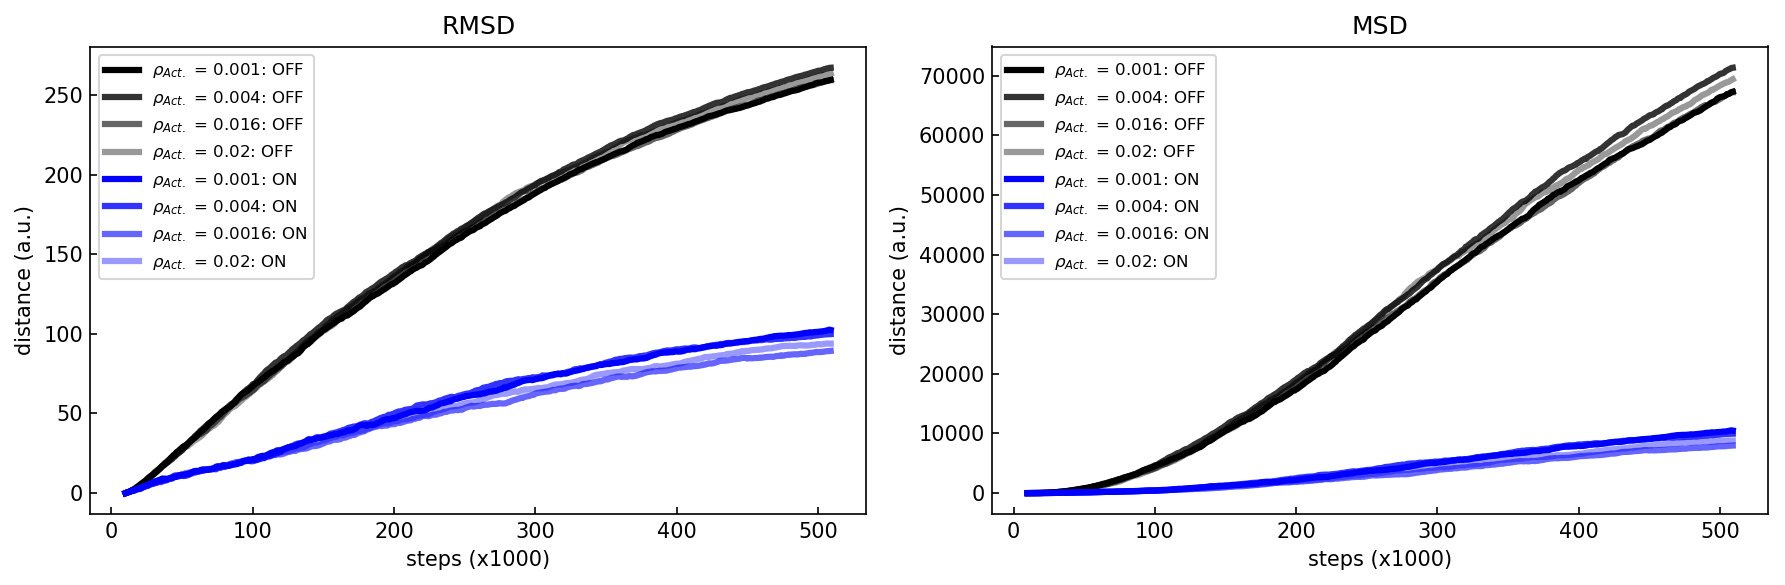

In [6]:
plotter('ver16','ver21')

# Resting Only

## Diffusion Model 
1. No Autocrine
2. No State Variable
3. No Cluster

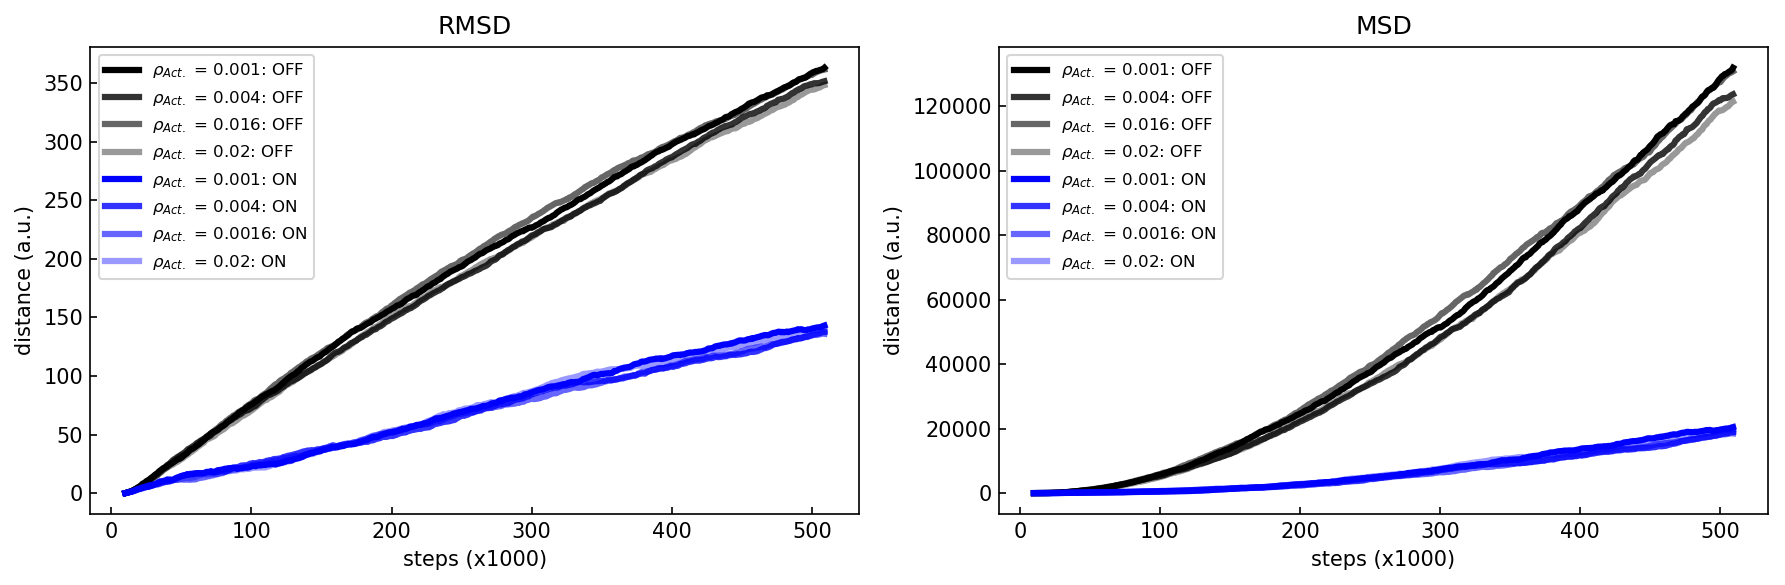

In [7]:
plotter('ver15','ver23')

# Resting Only

## Diffusion Model 
1. With Autocrine
2. No State Variable
3. No Cluster

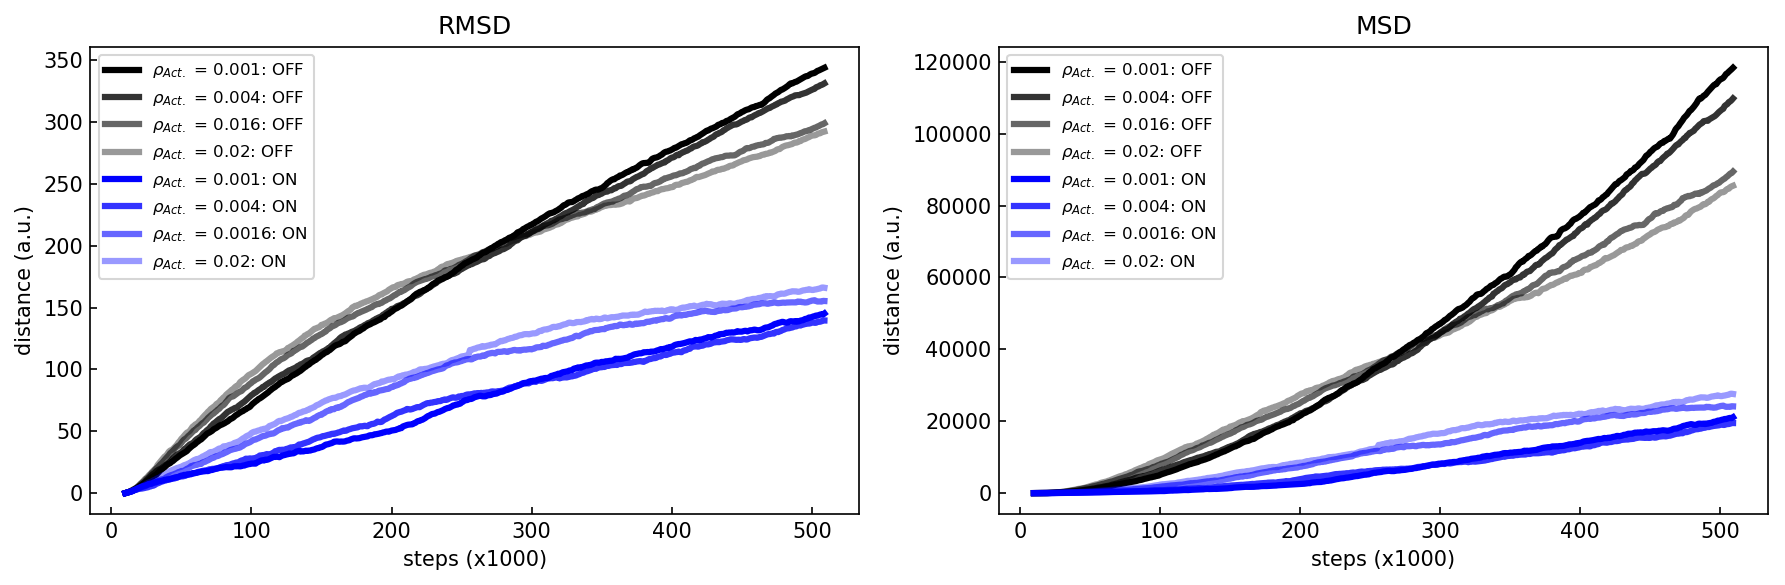

In [8]:
plotter('ver10','ver18')